<a href="https://colab.research.google.com/github/Dheerajthummala/Text_mining/blob/main/Text_mining(amazon_reviews).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import string
import spacy
import numpy as np
import matplotlib.pyplot as plt
from wordcloud import WordCloud,STOPWORDS

In [4]:
!python -m spacy download en_core_web_sm

2024-01-08 07:37:24.706456: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-01-08 07:37:24.706529: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-01-08 07:37:24.707811: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-01-08 07:37:25.995314: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 28.0 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [11]:
# DATA EXTRACTED by using webscrapping FROM THE amazon reviews on indus valley super smooth cast iron tawa(dosa pan)
import warnings
warnings.filterwarnings("ignore")
data=pd.read_csv('amazon_rev.csv',error_bad_lines=False,encoding='latin1')
data

Title  Rating  \
0     5.0 out of 5 stars\nA bit heavy but very very ...     5.0   
1      4.0 out of 5 stars\nPre-seasoned cast iron  tawa     4.0   
2              5.0 out of 5 stars\nHigh quality product     5.0   
3     1.0 out of 5 stars\nDON'T BUY. Your local Blac...     1.0   
4     3.0 out of 5 stars\nThe iron handle can burn u...     3.0   
...                                                 ...     ...   
1595  5.0 out of 5 stars\nFollow the instructions of...     5.0   
1596                      4.0 out of 5 stars\nVery good     4.0   
1597                2.0 out of 5 stars\nNot preseasoned     2.0   
1598  2.0 out of 5 stars\nThings are getting burnt w...     2.0   
1599  5.0 out of 5 stars\nGreat product value for money     5.0   

                                                 Review         Review_Date  
0     This is one of the best Tavas for making  dosa...       11 March 2023  
1     We are using  this  tawa to  make  dosas.Dosas...      25 August 2023  
2     I have to receive this Cast Iron Tawa. It is o...    11 November 2023  
3     I ordered this tawa on 15th April because my f...        31 July 2021  
4     The flat pan part is good but the handle is al...    26 December 2022  
...                                                 ...                 ...  
1595  We followed the instructions of the manufactur...     19 October 2023  
1596                             It is original product       13 April 2023  
1597  Burnt all dosas on first use, rusting after fi...    29 December 2023  
1598  It got rust so fast. And things are getting bu...   22 September 2023  
1599                      Great product value for money   22 September 2023  

[1600 rows x 4 columns]

In [13]:
data = [Review.strip() for Review in data.Review] # remove both the leading and the trailing characters
data= [Review for Review in data if Review] # removes empty strings, because they are considered in Python as False
data[0:10]

['This is one of the best Tavas for making  dosas. It is undoutedly heavy as it is made of cast iron however dosa pans should be heavy for best results. Please note that the handle becomes very hot and you need to have a silicon glove or a thick towel to hold the dosa handle. We reflexly hold the handle of the tava as we are used to the non stick tavas which have covered handles! So be careful.Never ever wash this tawa. only clean it with a tissue paper or a soft cloth after use. this will help givingtge  best result and the dosa will not stick on to it',
 'We are using  this  tawa to  make  dosas.Dosas are crisp.It requires  less oil.It is worth the  purchase.',
 'I have to receive this Cast Iron Tawa. It is of great quality.',
 'I ordered this tawa on 15th April because my friends had given glowing recommendations. I am EXTREMELY disappointed. The title says pre-seasoned but there\'s a catch. You have to season it multiple times before being able to cook with it. I\'ve lost multiple 

In [14]:
# Joining the list into one string/text
text = ' '.join(data)
text

'This is one of the best Tavas for making  dosas. It is undoutedly heavy as it is made of cast iron however dosa pans should be heavy for best results. Please note that the handle becomes very hot and you need to have a silicon glove or a thick towel to hold the dosa handle. We reflexly hold the handle of the tava as we are used to the non stick tavas which have covered handles! So be careful.Never ever wash this tawa. only clean it with a tissue paper or a soft cloth after use. this will help givingtge  best result and the dosa will not stick on to it We are using  this  tawa to  make  dosas.Dosas are crisp.It requires  less oil.It is worth the  purchase. I have to receive this Cast Iron Tawa. It is of great quality. I ordered this tawa on 15th April because my friends had given glowing recommendations. I am EXTREMELY disappointed. The title says pre-seasoned but there\'s a catch. You have to season it multiple times before being able to cook with it. I\'ve lost multiple ladlefuls of 

In [15]:
#Punctuation
no_punc_text = text.translate(str.maketrans('', '', string.punctuation)) #with arguments (x, y, z) where 'x' and 'y'
# must be equal-length strings and characters in 'x'
# are replaced by characters in 'y'. 'z'
# is a string (string.punctuation here)
no_punc_text

'This is one of the best Tavas for making  dosas It is undoutedly heavy as it is made of cast iron however dosa pans should be heavy for best results Please note that the handle becomes very hot and you need to have a silicon glove or a thick towel to hold the dosa handle We reflexly hold the handle of the tava as we are used to the non stick tavas which have covered handles So be carefulNever ever wash this tawa only clean it with a tissue paper or a soft cloth after use this will help givingtge  best result and the dosa will not stick on to it We are using  this  tawa to  make  dosasDosas are crispIt requires  less oilIt is worth the  purchase I have to receive this Cast Iron Tawa It is of great quality I ordered this tawa on 15th April because my friends had given glowing recommendations I am EXTREMELY disappointed The title says preseasoned but theres a catch You have to season it multiple times before being able to cook with it Ive lost multiple ladlefuls of dosa batter and burnt 

In [16]:
# remove https or url within text
import re
no_url_text=re.sub(r'http\S+', '', no_punc_text)
no_url_text

'This is one of the best Tavas for making  dosas It is undoutedly heavy as it is made of cast iron however dosa pans should be heavy for best results Please note that the handle becomes very hot and you need to have a silicon glove or a thick towel to hold the dosa handle We reflexly hold the handle of the tava as we are used to the non stick tavas which have covered handles So be carefulNever ever wash this tawa only clean it with a tissue paper or a soft cloth after use this will help givingtge  best result and the dosa will not stick on to it We are using  this  tawa to  make  dosasDosas are crispIt requires  less oilIt is worth the  purchase I have to receive this Cast Iron Tawa It is of great quality I ordered this tawa on 15th April because my friends had given glowing recommendations I am EXTREMELY disappointed The title says preseasoned but theres a catch You have to season it multiple times before being able to cook with it Ive lost multiple ladlefuls of dosa batter and burnt 

In [17]:
#Tokenization
import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize
text_tokens = word_tokenize(no_url_text)
print(text_tokens[0:50])

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


['This', 'is', 'one', 'of', 'the', 'best', 'Tavas', 'for', 'making', 'dosas', 'It', 'is', 'undoutedly', 'heavy', 'as', 'it', 'is', 'made', 'of', 'cast', 'iron', 'however', 'dosa', 'pans', 'should', 'be', 'heavy', 'for', 'best', 'results', 'Please', 'note', 'that', 'the', 'handle', 'becomes', 'very', 'hot', 'and', 'you', 'need', 'to', 'have', 'a', 'silicon', 'glove', 'or', 'a', 'thick', 'towel']


In [18]:
len(text_tokens)

70400

In [19]:
#Remove stopwords
import nltk
from nltk.corpus import stopwords
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [20]:
my_stop_words = stopwords.words('english')
irwords=['I\x92m']
my_stop_words.extend(irwords)
no_stop_tokens = [word for word in text_tokens if not word in my_stop_words]
print(no_stop_tokens)

['This', 'one', 'best', 'Tavas', 'making', 'dosas', 'It', 'undoutedly', 'heavy', 'made', 'cast', 'iron', 'however', 'dosa', 'pans', 'heavy', 'best', 'results', 'Please', 'note', 'handle', 'becomes', 'hot', 'need', 'silicon', 'glove', 'thick', 'towel', 'hold', 'dosa', 'handle', 'We', 'reflexly', 'hold', 'handle', 'tava', 'used', 'non', 'stick', 'tavas', 'covered', 'handles', 'So', 'carefulNever', 'ever', 'wash', 'tawa', 'clean', 'tissue', 'paper', 'soft', 'cloth', 'use', 'help', 'givingtge', 'best', 'result', 'dosa', 'stick', 'We', 'using', 'tawa', 'make', 'dosasDosas', 'crispIt', 'requires', 'less', 'oilIt', 'worth', 'purchase', 'I', 'receive', 'Cast', 'Iron', 'Tawa', 'It', 'great', 'quality', 'I', 'ordered', 'tawa', '15th', 'April', 'friends', 'given', 'glowing', 'recommendations', 'I', 'EXTREMELY', 'disappointed', 'The', 'title', 'says', 'preseasoned', 'theres', 'catch', 'You', 'season', 'multiple', 'times', 'able', 'cook', 'Ive', 'lost', 'multiple', 'ladlefuls', 'dosa', 'batter', 'b

In [21]:
#Noramalize the data
lower_words = [x.lower() for x in no_stop_tokens]
print(lower_words[0:25])

['this', 'one', 'best', 'tavas', 'making', 'dosas', 'it', 'undoutedly', 'heavy', 'made', 'cast', 'iron', 'however', 'dosa', 'pans', 'heavy', 'best', 'results', 'please', 'note', 'handle', 'becomes', 'hot', 'need', 'silicon']


In [22]:
# NLP english language model of spacy library
nlp = spacy.load('en_core_web_sm')

In [23]:
# lemmatizion
# lemmas being one of them, but mostly POS, which will follow later
doc = nlp(' '.join(lower_words))
print(doc[0:40])

this one best tavas making dosas it undoutedly heavy made cast iron however dosa pans heavy best results please note handle becomes hot need silicon glove thick towel hold dosa handle we reflexly hold handle tava used non stick tavas


In [24]:
lemmas = [token.lemma_ for token in doc]
print(lemmas[0:50])

['this', 'one', 'good', 'tavas', 'make', 'dosa', 'it', 'undoutedly', 'heavy', 'make', 'cast', 'iron', 'however', 'dosa', 'pan', 'heavy', 'good', 'result', 'please', 'note', 'handle', 'become', 'hot', 'need', 'silicon', 'glove', 'thick', 'towel', 'hold', 'dosa', 'handle', 'we', 'reflexly', 'hold', 'handle', 'tava', 'use', 'non', 'stick', 'tavas', 'cover', 'handle', 'so', 'carefulnever', 'ever', 'wash', 'tawa', 'clean', 'tissue', 'paper']


In [25]:
# FEATURE EXTRACTION
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(lemmas)

In [26]:
print(vectorizer.vocabulary_)

{'this': 143, 'one': 92, 'good': 55, 'tavas': 135, 'make': 78, 'dosa': 32, 'it': 71, 'undoutedly': 149, 'heavy': 61, 'cast': 19, 'iron': 70, 'however': 65, 'pan': 95, 'result': 113, 'please': 101, 'note': 89, 'handle': 58, 'become': 14, 'hot': 64, 'need': 86, 'silicon': 126, 'glove': 53, 'thick': 140, 'towel': 148, 'hold': 63, 'we': 162, 'reflexly': 110, 'tava': 134, 'use': 154, 'non': 87, 'stick': 130, 'cover': 26, 'so': 128, 'carefulnever': 18, 'ever': 40, 'wash': 160, 'tawa': 136, 'clean': 21, 'tissue': 145, 'paper': 96, 'soft': 129, 'cloth': 22, 'help': 62, 'givingtge': 52, 'dosasdosa': 33, 'crispit': 28, 'require': 112, 'less': 75, 'oilit': 91, 'worth': 166, 'purchase': 105, 'receive': 108, 'great': 56, 'quality': 106, 'order': 93, '15th': 0, 'april': 10, 'friend': 48, 'give': 51, 'glow': 54, 'recommendation': 109, 'extremely': 42, 'disappoint': 30, 'the': 138, 'title': 146, 'say': 122, 'preseasone': 103, 'there': 139, 'catch': 20, 'you': 169, 'season': 123, 'multiple': 85, 'time'

In [27]:
print(vectorizer.get_feature_names_out()[100:300])
print(X.toarray()[100:300])

['platform' 'please' 'pray' 'preseasone' 'product' 'purchase' 'quality'
 'really' 'receive' 'recommendation' 'reflexly' 'reply' 'require' 'result'
 'review' 'right' 'rotis' 'run' 'rust' 'safety' 'satisfied' 'save' 'say'
 'season' 'see' 'seep' 'silicon' 'since' 'so' 'soft' 'stick' 'subsequent'
 'sudden' 'suggest' 'tava' 'tavas' 'tawa' 'tell' 'the' 'there' 'thick'
 'thickness' 'thing' 'this' 'time' 'tissue' 'title' 'touch' 'towel'
 'undoutedly' 'uneven' 'unreliable' 'upkeep' 'usage' 'use' 'utensil'
 'valley' 'value' 've' 'vendor' 'wash' 'way' 'we' 'well' 'what' 'wood'
 'worth' 'would' 'write' 'you']
[[0 0 0 ... 0 0 0]
 [0 1 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [28]:
print(X.toarray().shape)

(41120, 170)


In [29]:
words=' '.join(lemmas)
words

'this one good tavas make dosa it undoutedly heavy make cast iron however dosa pan heavy good result please note handle become hot need silicon glove thick towel hold dosa handle we reflexly hold handle tava use non stick tavas cover handle so carefulnever ever wash tawa clean tissue paper soft cloth use help givingtge good result dosa stick we use tawa make dosasdosa crispit require less oilit worth purchase I receive cast iron tawa it great quality I order tawa 15th april friend give glow recommendation I extremely disappoint the title say preseasone there s catch you season multiple time able cook I ve lose multiple ladleful dosa batter burn rotis uneven heat it barely 3 month since I ve use see crack tawa the oil seep crack run right across entire thickness tawa extremely unreliable not at all durable I get touch instagram since I get many ad sudden person reply dms suggest I contact amazon customer care escalate end what a joke pray tell ecommerce platform product especially there

In [30]:
# 2) bigrams and trigrams
vectorizer_ngram_range = CountVectorizer(analyzer='word',ngram_range=(1,3),max_features = 100)
bow_matrix_ngram =vectorizer_ngram_range.fit_transform(lemmas)

In [31]:
print(vectorizer_ngram_range.get_feature_names_out())
print(bow_matrix_ngram.toarray())

['15th' 'also' 'burn' 'cast' 'contact' 'cook' 'could' 'cover' 'crack'
 'crispit' 'dosa' 'extremely' 'first' 'get' 'good' 'great' 'handle'
 'heavy' 'hold' 'hot' 'iron' 'it' 'make' 'money' 'much' 'multiple' 'order'
 'pan' 'paper' 'part' 'performance' 'person' 'platform' 'please' 'pray'
 'preseasone' 'product' 'purchase' 'quality' 'really' 'receive'
 'recommendation' 'reflexly' 'reply' 'require' 'result' 'review' 'right'
 'rotis' 'run' 'rust' 'safety' 'satisfied' 'save' 'say' 'season' 'see'
 'seep' 'silicon' 'since' 'so' 'soft' 'stick' 'subsequent' 'sudden'
 'suggest' 'tava' 'tavas' 'tawa' 'tell' 'the' 'there' 'thick' 'thickness'
 'thing' 'this' 'time' 'tissue' 'title' 'touch' 'towel' 'undoutedly'
 'uneven' 'unreliable' 'upkeep' 'usage' 'use' 'utensil' 'valley' 'value'
 've' 'vendor' 'wash' 'way' 'we' 'well' 'what' 'wood' 'worth' 'would']
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [32]:
#TFidf vectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer_n_gram_max_features = TfidfVectorizer(norm="l2",analyzer='word', ngram_range=(1,3), max_features = 100)
tf_idf_matrix_n_gram_max_features =vectorizer_n_gram_max_features.fit_transform(lemmas)
print(vectorizer_n_gram_max_features.get_feature_names_out())
print(tf_idf_matrix_n_gram_max_features.toarray())

['15th' 'also' 'burn' 'cast' 'contact' 'cook' 'could' 'cover' 'crack'
 'crispit' 'dosa' 'extremely' 'first' 'get' 'good' 'great' 'handle'
 'heavy' 'hold' 'hot' 'iron' 'it' 'make' 'money' 'much' 'multiple' 'order'
 'pan' 'paper' 'part' 'performance' 'person' 'platform' 'please' 'pray'
 'preseasone' 'product' 'purchase' 'quality' 'really' 'receive'
 'recommendation' 'reflexly' 'reply' 'require' 'result' 'review' 'right'
 'rotis' 'run' 'rust' 'safety' 'satisfied' 'save' 'say' 'season' 'see'
 'seep' 'silicon' 'since' 'so' 'soft' 'stick' 'subsequent' 'sudden'
 'suggest' 'tava' 'tavas' 'tawa' 'tell' 'the' 'there' 'thick' 'thickness'
 'thing' 'this' 'time' 'tissue' 'title' 'touch' 'towel' 'undoutedly'
 'uneven' 'unreliable' 'upkeep' 'usage' 'use' 'utensil' 'valley' 'value'
 've' 'vendor' 'wash' 'way' 'we' 'well' 'what' 'wood' 'worth' 'would']
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0

In [33]:
# word cloud
def plot_cloud(wordcloud):
    # Set figure size
    plt.figure(figsize=(40, 30))
    # Display image
    plt.imshow(wordcloud)
    # No axis details
    plt.axis("off");

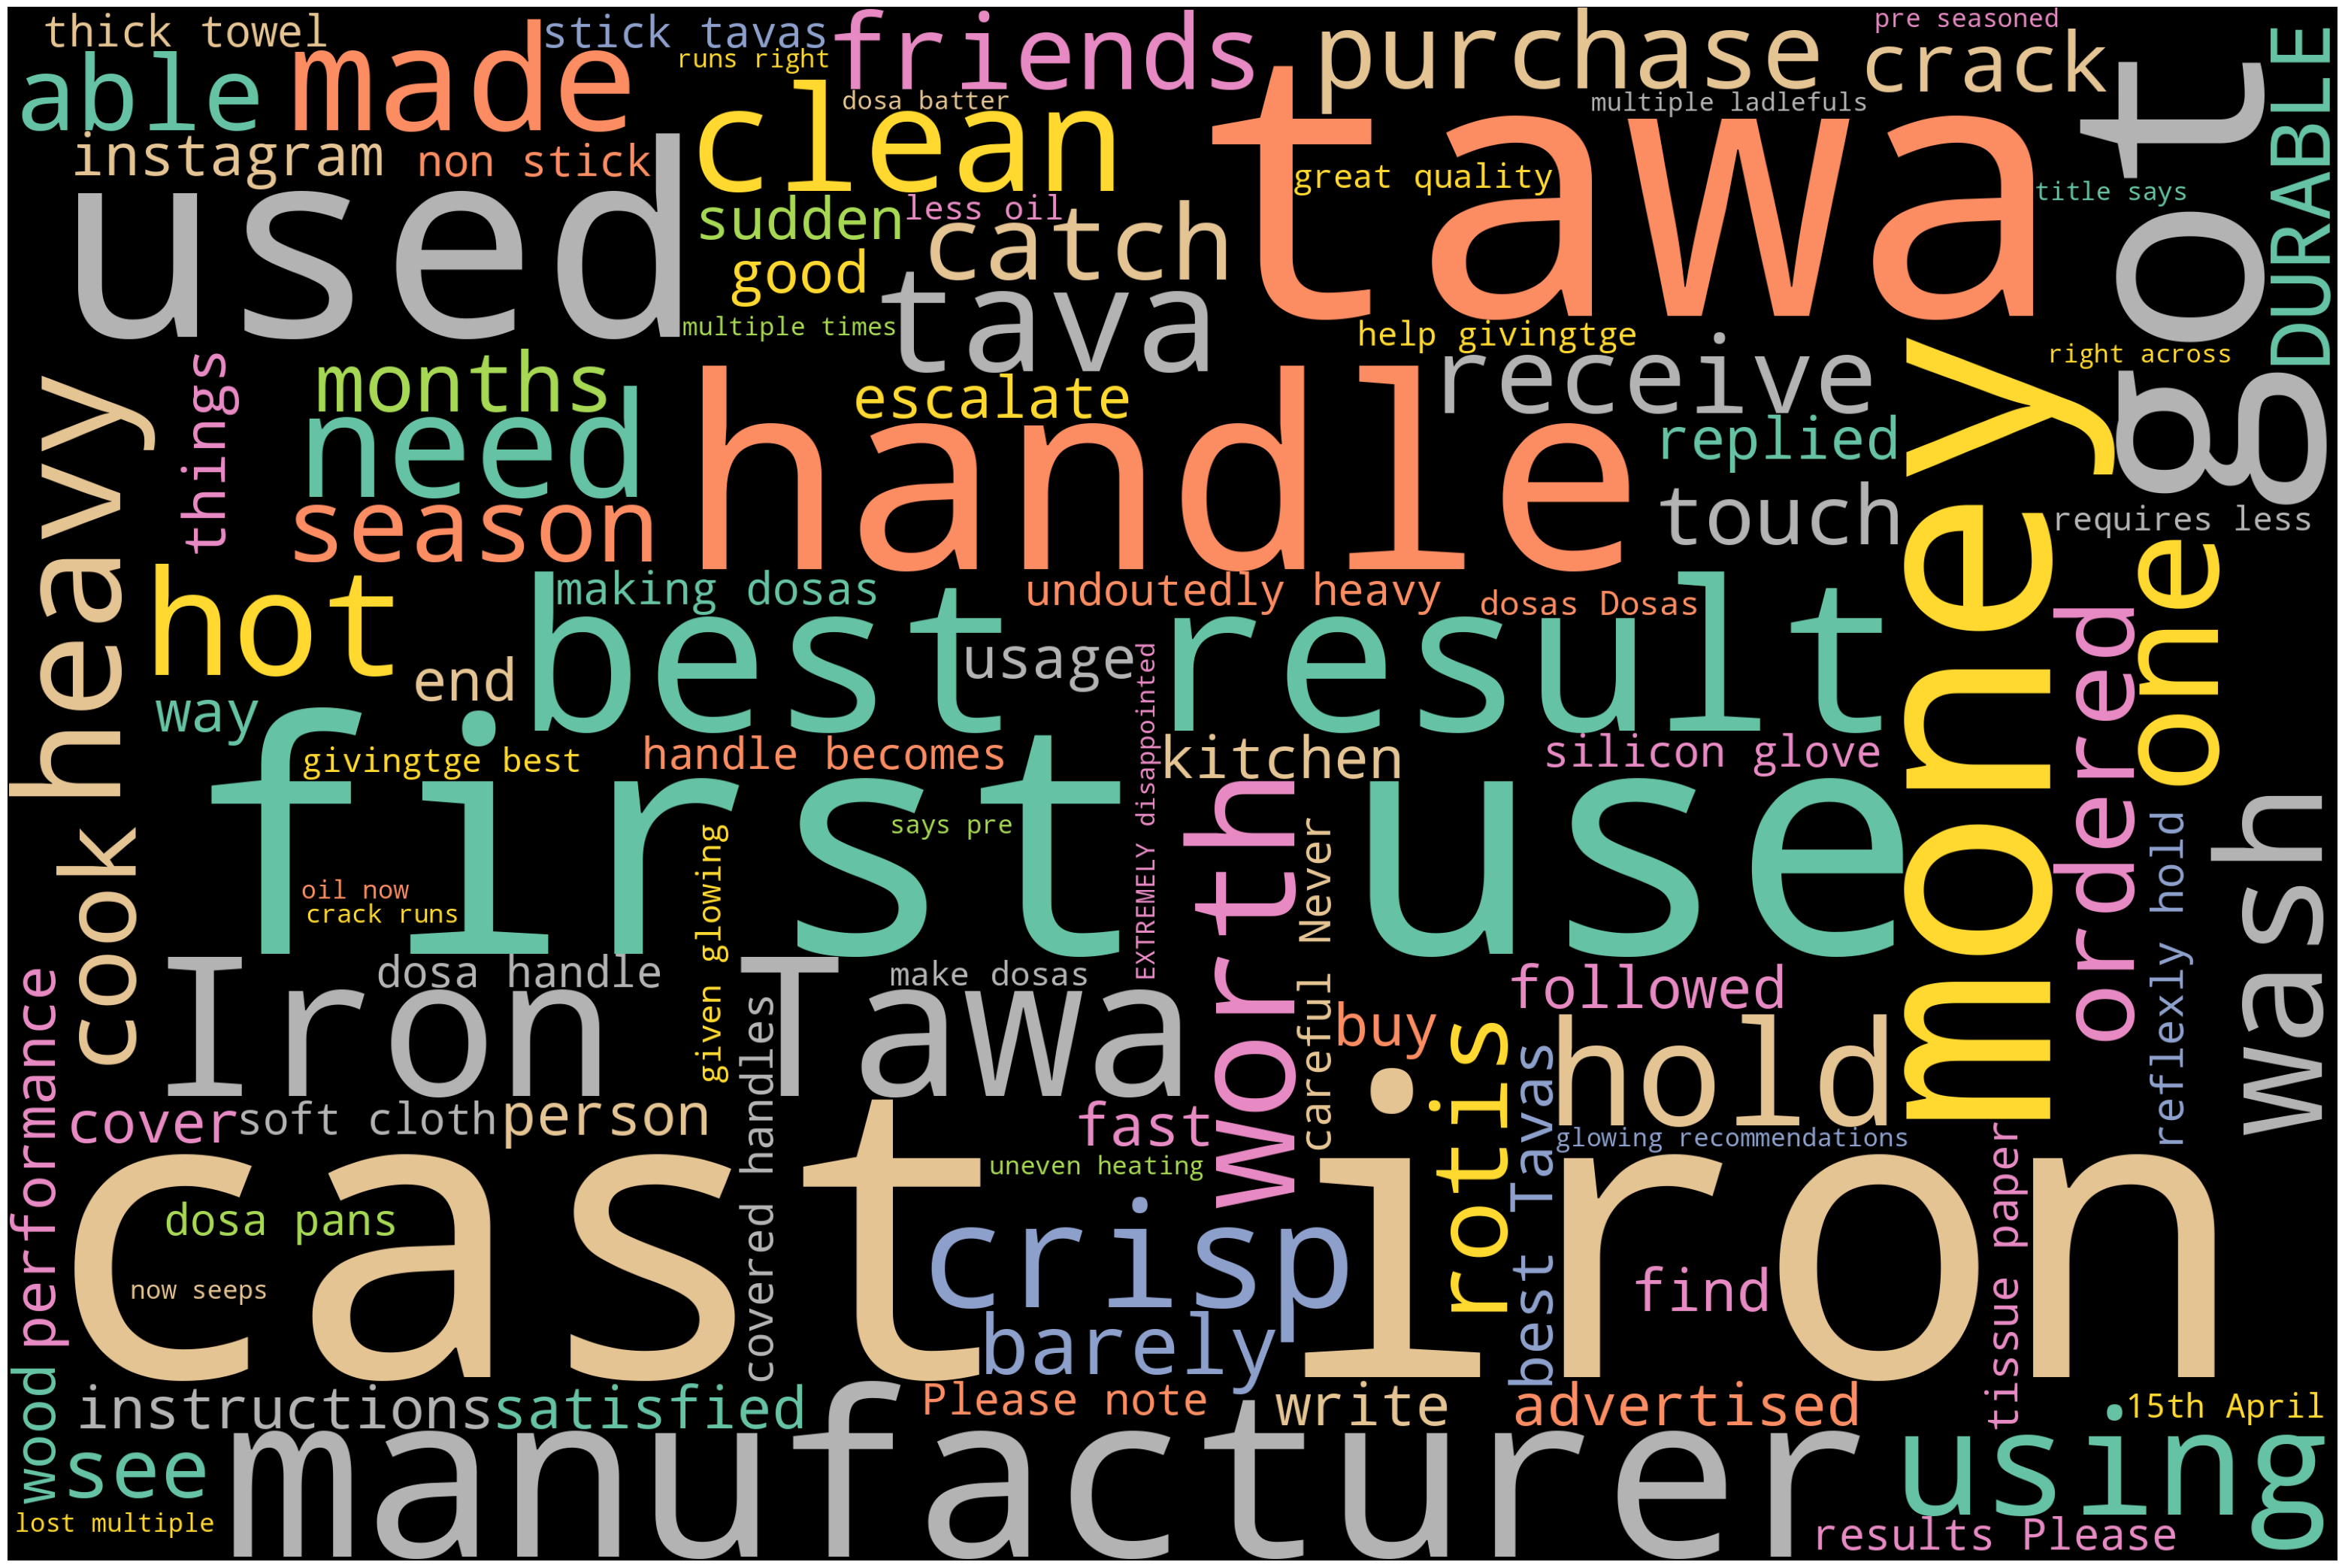

In [34]:
#Generate wordcloud
stopwords = STOPWORDS
stopwords.add('will')
stopwords.add('https')
stopwords.add('t')
stopwords.add('co')
stopwords.add('amp')
stopwords.add( 'flcnhvy')
wordcloud = WordCloud(width = 3000, height = 2000, background_color='black', max_words=100,colormap='Set2',stopwords=stopwords).generate(text)
# Plot
plot_cloud(wordcloud)

In [35]:
# NAMED ENTITY RECOGNITION
##Part Of Speech Tagging
nlp = spacy.load('en_core_web_sm')

In [36]:
one_block = words
doc_block = nlp(one_block)
spacy.displacy.render(doc_block, style='ent', jupyter=True)

In [37]:
one_block

'this one good tavas make dosa it undoutedly heavy make cast iron however dosa pan heavy good result please note handle become hot need silicon glove thick towel hold dosa handle we reflexly hold handle tava use non stick tavas cover handle so carefulnever ever wash tawa clean tissue paper soft cloth use help givingtge good result dosa stick we use tawa make dosasdosa crispit require less oilit worth purchase I receive cast iron tawa it great quality I order tawa 15th april friend give glow recommendation I extremely disappoint the title say preseasone there s catch you season multiple time able cook I ve lose multiple ladleful dosa batter burn rotis uneven heat it barely 3 month since I ve use see crack tawa the oil seep crack run right across entire thickness tawa extremely unreliable not at all durable I get touch instagram since I get many ad sudden person reply dms suggest I contact amazon customer care escalate end what a joke pray tell ecommerce platform product especially there

In [38]:
for token in doc_block[0:20]:
    print(token, token.pos_)

this DET
one NUM
good ADJ
tavas NOUN
make VERB
dosa NOUN
it PRON
undoutedly ADV
heavy ADJ
make VERB
cast NOUN
iron NOUN
however ADV
dosa PROPN
pan PROPN
heavy PROPN
good ADJ
result NOUN
please INTJ
note VERB


In [39]:
#Filtering for nouns and verbs only
nouns_verbs = [token.text for token in doc_block if token.pos_ in ('NOUN', 'VERB')]
print(nouns_verbs[5:25])

['iron', 'result', 'note', 'handle', 'become', 'need', 'silicon', 'towel', 'hold', 'handle', 'reflexly', 'hold', 'handle', 'tava', 'tavas', 'cover', 'handle', 'wash', 'paper', 'cloth']


In [40]:
#Counting tokens again
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()

X = cv.fit_transform(nouns_verbs)
sum_words = X.sum(axis=0)
words_freq = [(word, sum_words[0, idx]) for word, idx in cv.vocabulary_.items()]
words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
wf_df = pd.DataFrame(words_freq)
wf_df.columns = ['word', 'count']

wf_df[0:10]

word  count
0     iron    960
1      use    960
2   handle    800
3     dosa    640
4     cast    640
5      get    640
6  product    640
7     make    480
8     tawa    480
9    tavas    320

<Axes: title={'center': 'Top verbs and nouns'}, xlabel='word'>

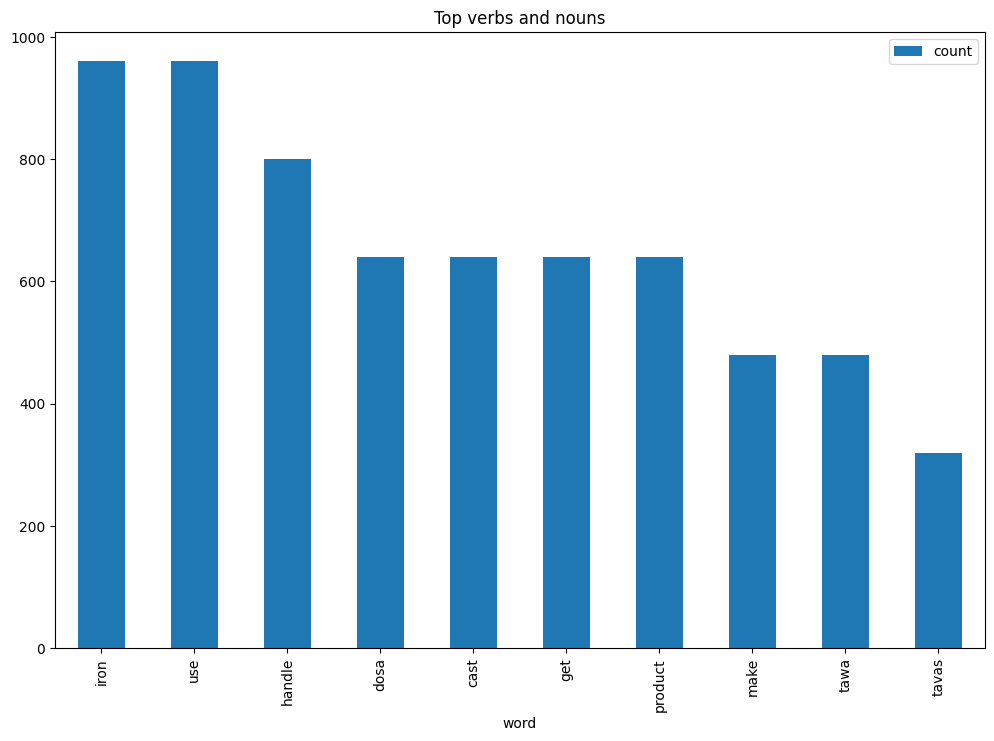

In [41]:
##Visualizing results
#Barchart for top 10 nouns + verbs
wf_df[0:10].plot.bar(x='word', figsize=(12,8), title='Top verbs and nouns')

In [42]:
# SENTIMENTAL ANAALYSIS
from nltk import tokenize
sentences = tokenize.sent_tokenize(" ".join(data1))
sentences[5:15]

['only clean it with a tissue paper or a soft cloth after use.',
 'this will help givingtge  best result and the dosa will not stick on to it We are using  this  tawa to  make  dosas.Dosas are crisp.It requires  less oil.It is worth the  purchase.',
 'I have to receive this Cast Iron Tawa.',
 'It is of great quality.',
 'I ordered this tawa on 15th April because my friends had given glowing recommendations.',
 'I am EXTREMELY disappointed.',
 "The title says pre-seasoned but there's a catch.",
 'You have to season it multiple times before being able to cook with it.',
 "I've lost multiple ladlefuls of dosa batter and burnt my rotis because of the uneven heating.",
 "It has barely been 3 months since I've used it and you can see the crack in the tawa."]

In [43]:
sent_df=pd.DataFrame(sentences,columns=['sentence'])
sent_df

sentence
0      This is one of the best Tavas for making  dosas.
1     It is undoutedly heavy as it is made of cast i...
2     Please note that the handle becomes very hot a...
3     We reflexly hold the handle of the tava as we ...
4              So be careful.Never ever wash this tawa.
...                                                 ...
4156  The flat pan part is good but the handle is al...
4157  If they could cover it with wood it would be m...
4158  We followed the instructions of the manufactur...
4159  It is original product Burnt all dosas on firs...
4160  And things are getting burnt.. Great product v...

[4161 rows x 1 columns]

In [45]:
# Emotion Lexicon - Affin
affin=pd.read_csv('Afinn.csv',sep=',',encoding='Latin-1')
affin

word  value
0       abandon     -2
1     abandoned     -2
2      abandons     -2
3      abducted     -2
4     abduction     -2
...         ...    ...
2472      yucky     -2
2473      yummy      3
2474     zealot     -2
2475    zealots     -2
2476    zealous      2

[2477 rows x 2 columns]

In [46]:
affinity_scores = affin.set_index('word')['value'].to_dict()
affinity_scores

{'abandon': -2,
 'abandoned': -2,
 'abandons': -2,
 'abducted': -2,
 'abduction': -2,
 'abductions': -2,
 'abhor': -3,
 'abhorred': -3,
 'abhorrent': -3,
 'abhors': -3,
 'abilities': 2,
 'ability': 2,
 'aboard': 1,
 'absentee': -1,
 'absentees': -1,
 'absolve': 2,
 'absolved': 2,
 'absolves': 2,
 'absolving': 2,
 'absorbed': 1,
 'abuse': -3,
 'abused': -3,
 'abuses': -3,
 'abusive': -3,
 'accept': 1,
 'accepted': 1,
 'accepting': 1,
 'accepts': 1,
 'accident': -2,
 'accidental': -2,
 'accidentally': -2,
 'accidents': -2,
 'accomplish': 2,
 'accomplished': 2,
 'accomplishes': 2,
 'accusation': -2,
 'accusations': -2,
 'accuse': -2,
 'accused': -2,
 'accuses': -2,
 'accusing': -2,
 'ache': -2,
 'achievable': 1,
 'aching': -2,
 'acquit': 2,
 'acquits': 2,
 'acquitted': 2,
 'acquitting': 2,
 'acrimonious': -3,
 'active': 1,
 'adequate': 1,
 'admire': 3,
 'admired': 3,
 'admires': 3,
 'admiring': 3,
 'admit': -1,
 'admits': -1,
 'admitted': -1,
 'admonish': -2,
 'admonished': -2,
 'adopt': 

In [47]:
#Custom function :score each word in a sentence in lemmatised form,
#but calculate the score for the whole original sentence.
nlp = spacy.load('en_core_web_sm')
sentiment_lexicon = affinity_scores

def calculate_sentiment(text: str = None):
    sent_score = 0
    if text:
        sentence = nlp(text)
        for word in sentence:
            sent_score += sentiment_lexicon.get(word.lemma_, 0)
    return sent_score

In [48]:
# test that it works
calculate_sentiment(text = 'amazing')

4

In [49]:
sent_df['sentiment_value'] = sent_df['sentence'].apply(calculate_sentiment)

In [50]:
# how many words are in the sentence?
sent_df['word_count'] = sent_df['sentence'].str.split().apply(len)
sent_df['word_count'].head(10)

0    10
1    20
2    25
3    21
4     7
5    13
6    32
7     8
8     5
9    14
Name: word_count, dtype: int64

In [51]:
sent_df.sort_values(by='sentiment_value')

sentence  sentiment_value  \
1284                       I am EXTREMELY disappointed.               -2   
3234                       I am EXTREMELY disappointed.               -2   
2818                       I am EXTREMELY disappointed.               -2   
738                        I am EXTREMELY disappointed.               -2   
1622                       I am EXTREMELY disappointed.               -2   
...                                                 ...              ...   
552   this will help givingtge  best result and the ...                7   
4010  this will help givingtge  best result and the ...                7   
2008  this will help givingtge  best result and the ...                7   
1878  this will help givingtge  best result and the ...                7   
3256  this will help givingtge  best result and the ...                7   

      word_count  
1284           4  
3234           4  
2818           4  
738            4  
1622           4  
...          ...  
552           32  
4010          32  
2008          32  
1878          32  
3256          32  

[4161 rows x 3 columns]

In [52]:
# Sentiment score of the whole review
sent_df['sentiment_value'].describe()

count    4161.000000
mean        1.422735
std         2.132589
min        -2.000000
25%         0.000000
50%         1.000000
75%         2.000000
max         7.000000
Name: sentiment_value, dtype: float64

In [53]:
# negative sentiment score of the whole review
sent_df[sent_df['sentiment_value']<=0]

sentence  sentiment_value  \
3     We reflexly hold the handle of the tava as we ...                0   
7                I have to receive this Cast Iron Tawa.                0   
9     I ordered this tawa on 15th April because my f...                0   
10                         I am EXTREMELY disappointed.               -2   
11     The title says pre-seasoned but there's a catch.                0   
...                                                 ...              ...   
4149  The oil now seeps out because the crack runs r...                0   
4150      EXTREMELY unreliable, and NOT AT ALL DURABLE.                0   
4154  Especially when there's no way to address grie...               -1   
4157  If they could cover it with wood it would be m...                0   
4159  It is original product Burnt all dosas on firs...                0   

      word_count  
3             21  
7              8  
9             14  
10             4  
11             8  
...          ...  
4149          17  
4150           7  
4154          16  
4157          12  
4159          19  

[2080 rows x 3 columns]

In [54]:
# positive sentiment score of the whole review
sent_df[sent_df['sentiment_value']>0]

sentence  sentiment_value  \
0      This is one of the best Tavas for making  dosas.                3   
1     It is undoutedly heavy as it is made of cast i...                3   
2     Please note that the handle becomes very hot a...                1   
4              So be careful.Never ever wash this tawa.                2   
5     only clean it with a tissue paper or a soft cl...                2   
...                                                 ...              ...   
4153  Pray tell, what does the e-commerce platform h...                1   
4155  Save your money and buy your cast iron dosa ta...                2   
4156  The flat pan part is good but the handle is al...                4   
4158  We followed the instructions of the manufactur...                5   
4160  And things are getting burnt.. Great product v...                3   

      word_count  
0             10  
1             20  
2             25  
4              7  
5             13  
...          ...  
4153          13  
4155          14  
4156          24  
4158          46  
4160          10  

[2081 rows x 3 columns]

<Axes: xlabel='sentiment_value', ylabel='Density'>

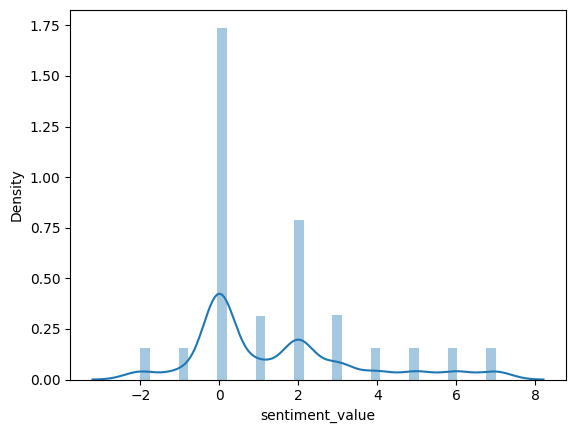

In [55]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.distplot(sent_df['sentiment_value'])

<Axes: title={'center': 'Sentence sentiment value to sentence word count'}, xlabel='word_count', ylabel='sentiment_value'>

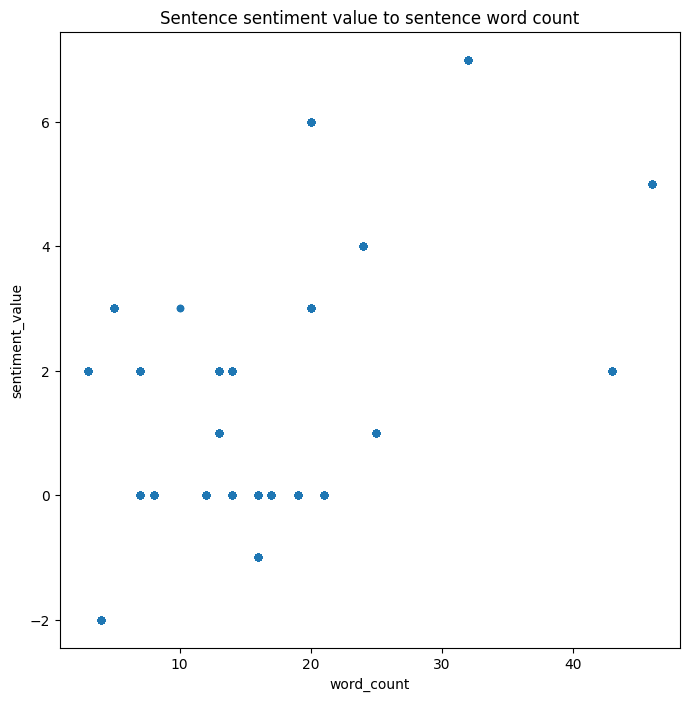

In [56]:
sent_df.plot.scatter(x='word_count', y='sentiment_value', figsize=(8,8), title='Sentence sentiment value to sentence word count')